In [1]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import dtype
import random
from pandas.core.tools.datetimes import to_datetime
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
# This code disables the display of warning messages to the console.

import warnings
warnings.filterwarnings("ignore")

# Data Acquisition

In [3]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

df = pd.DataFrame(data)

df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
807372  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
807373  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
807374  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
807375  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
807376  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
807372    16     Foothill         1663         2     740   
807373    16     Foothill         1602         1     230   
807374    12  77th Street         1239         1     230   
807375     1      Central          154         1     352   
807376     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
...                                                   ...  ...    ...   
807372  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
807373     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
807374     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
807375                                         PICKPOCKET  ...     IC   
807376           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   

         Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0        Adult Other    624.0      NaN       NaN      NaN   
1        Invest Cont    624.0      NaN       NaN      NaN   
2       Adult Arrest    845.0      NaN       NaN      NaN   
3        Invest Cont    745.0    998.0       NaN      NaN   
4        Invest Cont    740.0      NaN       NaN      NaN   
...              ...      ...      ...       ...      ...   
807372   Invest Cont    740.0      NaN       NaN      NaN   
807373   Invest Cont    230.0      NaN       NaN      NaN   
807374   Invest Cont    230.0      NaN       NaN      NaN   
807375   Invest Cont    352.0      NaN       NaN      NaN   
807376   Invest Cont    745.0      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2         200 E  6TH                          ST          NaN  34.0448   
3        5400    CORTEEN                      PL          NaN  34.1685   
4       14400    TITUS                        ST          NaN  34.2198   
...                                          ...          ...      ...   
807372  12500    BRANFORD                     ST          NaN  34.2466   
807373  12800    FILMORE                      ST          NaN  34.2790   
807374   6100 S  VERMONT                      AV          NaN  33.

# Data Inspection

In [4]:
# Display the first few rows of the dataset

df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [5]:
# Check the data types of each column

df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
df.describe()

DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  8.073770e+05  807377.000000  807377.000000  807377.000000   
mean   2.158850e+08    1335.489603      10.713686    1117.794578   
std    1.074677e+07     654.144480       6.092573     609.246761   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.101192e+08     900.000000       6.000000     622.000000   
50%    2.201087e+08    1415.000000      11.000000    1142.000000   
75%    2.219051e+08    1900.000000      16.000000    1617.000000   
max    2.399165e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  807377.000000  807377.000000  807377.000000  807368.000000   
mean        1.414134     500.748725      29.838388     305.740185   
std         0.492572     207.825396      21.766978     216.586242   
min         1.000000     110.000000      -3.000000     101.000000   
25%         1.000000     331.000000       8.000000     101.000000   
50%         1.000000     442.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     976.000000   

       Weapon Used Cd       Crm Cd 1      Crm Cd 2     Crm Cd 3    Crm Cd 4  \
count   281174.000000  807367.000000  59483.000000  1987.000000   58.000000   
mean       362.876077     500.487070    957.481028   983.894313  990.500000   
std        123.724210     207.614181    111.512248    50.749706   28.359998   
min        101.000000     110.000000    210.000000   434.000000  821.000000   
25%        310.000000     331.000000    998.000000   998.000000  998.000000   
50%        400.000000     442.000000    998.000000   998.000000  998.000000   
75%        400.000000     626.000000    998.000000   998.000000  998.000000   
max        516.000000     956.000000    999.000000   999.000000  999.000000   

                 LAT            LON  
count  807377.000000  807377.000000  
mean       33.978009    -118.022322  
std         1.804822       6.258038  
min         0.000000    -118.667600  
25%        34.013600    -118.429600  
50%        34.058400    -118.321500  
75%        34.163100    -118.273900  
max        34.334300       0.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807377 entries, 0 to 807376
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           807377 non-null  int64  
 1   Date Rptd       807377 non-null  object 
 2   DATE OCC        807377 non-null  object 
 3   TIME OCC        807377 non-null  int64  
 4   AREA            807377 non-null  int64  
 5   AREA NAME       807377 non-null  object 
 6   Rpt Dist No     807377 non-null  int64  
 7   Part 1-2        807377 non-null  int64  
 8   Crm Cd          807377 non-null  int64  
 9   Crm Cd Desc     807377 non-null  object 
 10  Mocodes         696010 non-null  object 
 11  Vict Age        807377 non-null  int64  
 12  Vict Sex        701468 non-null  object 
 13  Vict Descent    701460 non-null  object 
 14  Premis Cd       807368 non-null  float64
 15  Premis Desc     806901 non-null  object 
 16  Weapon Used Cd  281174 non-null  float64
 17  Weapon Des

# Data Cleaning

In [9]:
# Identifying missing data

df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           111367
Vict Age               0
Vict Sex          105909
Vict Descent      105917
Premis Cd              9
Premis Desc          476
Weapon Used Cd    526203
Weapon Desc       526203
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          747894
Crm Cd 3          805390
Crm Cd 4          807319
LOCATION               0
Cross Street      678145
LAT                    0
LON                    0
dtype: int64

In [10]:
# Dropping the columns which are having more than 80% missing data
# Filling object columns with mode of column
# Filling Numeric columns with mean of column

obj_cols = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']
drop_cols = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
num_cols = ['Premis Cd', 'Weapon Used Cd', 'Crm Cd 1']

df.drop(drop_cols, axis = 1, inplace = True)

for i in obj_cols:
    mode_value = df[i].mode()[0]
    print(mode_value)
    df[i].fillna(mode_value, inplace = True)

for i in num_cols:
    df[i].fillna(df[i].mean(), inplace = True)

0344
M
H
STREET
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)


In [11]:
# Checking if there is any other missing data

df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [12]:
# Drpooing the duplicates from dataframe

df.drop_duplicates()

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
807372  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
807373  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
807374  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
807375  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
807376  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
807372    16     Foothill         1663         2     740   
807373    16     Foothill         1602         1     230   
807374    12  77th Street         1239         1     230   
807375     1      Central          154         1     352   
807376     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Premis Cd  \
0                                BATTERY - SIMPLE ASSAULT  ...     501.0   
1                                BATTERY - SIMPLE ASSAULT  ...     102.0   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     726.0   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     409.0   
...                                                   ...  ...       ...   
807372  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     122.0   
807373     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     102.0   
807374     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     222.0   
807375                                         PICKPOCKET  ...     735.0   
807376           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     502.0   

                                         Premis Desc Weapon Used Cd  \
0                             SINGLE FAMILY DWELLING     400.000000   
1                                           SIDEWALK     500.000000   
2                                    POLICE FACILITY     362.876077   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     362.876077   
4                                BEAUTY SUPPLY STORE     362.876077   
...                                              ...            ...   
807372                      VEHICLE, PASSENGER/TRUCK     362.876077   
807373                                      SIDEWALK     400.000000   
807374                                    LAUNDROMAT     500.000000   
807375               NIGHT CLUB (OPEN EVENINGS ONLY)     362.876077   
807376  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     362.876077   

                                           Weapon Desc  Status   Status Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AA  Adult Arrest   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
4       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
...                                                ...     ...           ...   
807372  STRONG-A

In [13]:
# Convert data types

dates = ['Date Rptd', 'DATE OCC']
times = ['TIME OCC']
int_type = ['Weapon Used Cd', 'Premis Cd', 'Crm Cd 1']



for i in dates:
  df[i] = to_datetime(df[i], format = 'mixed')

for i in times:
  df[i] = df[i].astype(str).str.zfill(4)
  df[i] = to_datetime(df[i], format = '%H%M').dt.time

for i in int_type:
  df[i] = df[i].astype(np.int64)

df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                  object
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                  int64
Premis Desc               object
Weapon Used Cd             int64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                   int64
LOCATION                  object
LAT                      float64
LON                      float64
dtype: object

In [14]:
df

DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  \
0        10304468 2020-01-08 2020-01-08  22:30:00     3    Southwest   
1       190101086 2020-01-02 2020-01-01  03:30:00     1      Central   
2       200110444 2020-04-14 2020-02-13  12:00:00     1      Central   
3       191501505 2020-01-01 2020-01-01  17:30:00    15  N Hollywood   
4       191921269 2020-01-01 2020-01-01  04:15:00    19      Mission   
...           ...        ...        ...       ...   ...          ...   
807372  231604807 2023-01-27 2023-01-26  18:00:00    16     Foothill   
807373  231606525 2023-03-22 2023-03-22  10:00:00    16     Foothill   
807374  231210064 2023-04-12 2023-04-12  16:30:00    12  77th Street   
807375  230115220 2023-07-02 2023-07-01  00:01:00     1      Central   
807376  230906458 2023-03-05 2023-03-05  09:00:00     9     Van Nuys   

        Rpt Dist No  Part 1-2  Crm Cd  \
0               377         2     624   
1               163         2     624   
2               155         2     845   
3              1543         2     745   
4              1998         2     740   
...             ...       ...     ...   
807372         1663         2     740   
807373         1602         1     230   
807374         1239         1     230   
807375          154         1     352   
807376          914         2     745   

                                              Crm Cd Desc  ... Premis Cd  \
0                                BATTERY - SIMPLE ASSAULT  ...       501   
1                                BATTERY - SIMPLE ASSAULT  ...       102   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...       726   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...       502   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...       409   
...                                                   ...  ...       ...   
807372  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...       122   
807373     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...       102   
807374     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...       222   
807375                                         PICKPOCKET  ...       735   
807376           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...       502   

                                         Premis Desc Weapon Used Cd  \
0                             SINGLE FAMILY DWELLING            400   
1                                           SIDEWALK            500   
2                                    POLICE FACILITY            362   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            362   
4                                BEAUTY SUPPLY STORE            362   
...                                              ...            ...   
807372                      VEHICLE, PASSENGER/TRUCK            362   
807373                                      SIDEWALK            400   
807374                                    LAUNDROMAT            500   
807375               NIGHT CLUB (OPEN EVENINGS ONLY)            362   
807376  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            362   

                                           Weapon Desc  Status   Status Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AO   Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
2       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      AA  Adult Arrest   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
4       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
...                                                ...     ...           ...   
807372  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
807373  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
807374                     UNKNOWN WEAPON/OTHER WEAPON      IC   Invest Cont   
807375  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   Invest Cont   
807376  

In [15]:
# Normalizing data using min-max normalization

# This function normalizes the values in a given column to the range [0, 1].
# It takes the input 'column' and scales its values so that the minimum value becomes 0 and the maximum value becomes 1.

def norm(column):
  # Calculate the range of values in the column (max - min).
  max_min = column.max() - column.min()
  return (column - column.min()) / max_min

In [16]:
# Normalize numerical data

# Iterate over each column in the DataFrame 'df'.
for i in df.columns:
    # Check if the data type of the column is np.int64 (64-bit integer).
  if df[i].dtype == np.int64:
    # Perform the Shapiro-Wilk normality test on the column.
    stat, p_value = shapiro(df[i])
    # Check if the p-value from the Shapiro-Wilk test is less than 0.05 (a common significance level).
    if p_value < 0.05:
      print(i)
      df[i] = norm(df[i]) # Apply a normalizing transformation to the column.

DR_NO
AREA
Rpt Dist No
Part 1-2
Crm Cd
Vict Age
Premis Cd
Weapon Used Cd
Crm Cd 1


In [17]:
### Encoding data

df_enc = df.copy()

li = ['AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION']

# Initialize a LabelEncoder instance.
le = LabelEncoder()
for i in li:
  df_enc[i] = le.fit_transform(df_enc[i])

# The 'df_enc' DataFrame now contains the original data with the specified columns encoded as numerical values.
df_enc

DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA  AREA NAME  \
0       0.042947 2020-01-08 2020-01-08  22:30:00  0.10         15   
1       0.792363 2020-01-02 2020-01-01  03:30:00  0.00          1   
2       0.834083 2020-04-14 2020-02-13  12:00:00  0.00          1   
3       0.798200 2020-01-01 2020-01-01  17:30:00  0.70          8   
4       0.799950 2020-01-01 2020-01-01  04:15:00  0.90          7   
...          ...        ...        ...       ...   ...        ...   
807372  0.965356 2023-01-27 2023-01-26  18:00:00  0.75          3   
807373  0.965363 2023-03-22 2023-03-22  10:00:00  0.75          3   
807374  0.963710 2023-04-12 2023-04-12  16:30:00  0.55          0   
807375  0.959147 2023-07-02 2023-07-01  00:01:00  0.00          1   
807376  0.962445 2023-03-05 2023-03-05  09:00:00  0.40         17   

        Rpt Dist No  Part 1-2    Crm Cd  Crm Cd Desc  ...  Premis Cd  \
0          0.131554       1.0  0.607565            4  ...   0.457143   
1          0.029552       1.0  0.607565            4  ...   0.001143   
2          0.025739       1.0  0.868794          100  ...   0.714286   
3          0.687321       1.0  0.750591          130  ...   0.458286   
4          0.904194       1.0  0.744681          129  ...   0.352000   
...             ...       ...       ...          ...  ...        ...   
807372     0.744519       1.0  0.744681          129  ...   0.024000   
807373     0.715443       0.0  0.141844            2  ...   0.001143   
807374     0.542421       0.0  0.141844            2  ...   0.138286   
807375     0.025262       0.0  0.286052           88  ...   0.724571   
807376     0.387512       1.0  0.750591          130  ...   0.458286   

        Premis Desc  Weapon Used Cd  Weapon Desc  Status  Status Desc  \
0               255        0.720482           65       1            1   
1               254        0.961446           75       3            2   
2               235        0.628916           65       0            0   
3               207        0.628916           65       3            2   
4                23        0.628916           65       3            2   
...             ...             ...          ...     ...          ...   
807372          298        0.628916           65       3            2   
807373          254        0.720482           65       3            2   
807374          101        0.961446           75       3            2   
807375          212        0.628916           65       3            2   
807376          207        0.628916           65       3            2   

        Crm Cd 1  LOCATION      LAT       LON  
0       0.607565      5134  34.0141 -118.2978  
1       0.607565     46427  34.0459 -118.2545  
2       0.868794     21922  34.0448 -118.2474  
3       0.750591     40378  34.1685 -118.4019  
4       0.744681     13396  34.2198 -118.4468  
...          ...       ...      ...       ...  
807372  0.744681      9088  34.2466 -118.4054  
807373  0.141844      9608  34.2790 -118.4116  
807374  0.141844     43521  33.9841 -118.2915  
807375  0.286052     38717  34.0467 -118.2485  
807376  0.750591     13449  34.1951 -118.4487  

[807377 rows x 24 columns]

# Exploratory Data Analysis

#### Overall Crime Trends

In [18]:
# Extract the year and month from the 'DATE OCC' column and add them as new columns to the DataFrame 'df'.

df['occ_year'] = df['DATE OCC'].dt.year
df['occ_month'] = df['DATE OCC'].dt.month

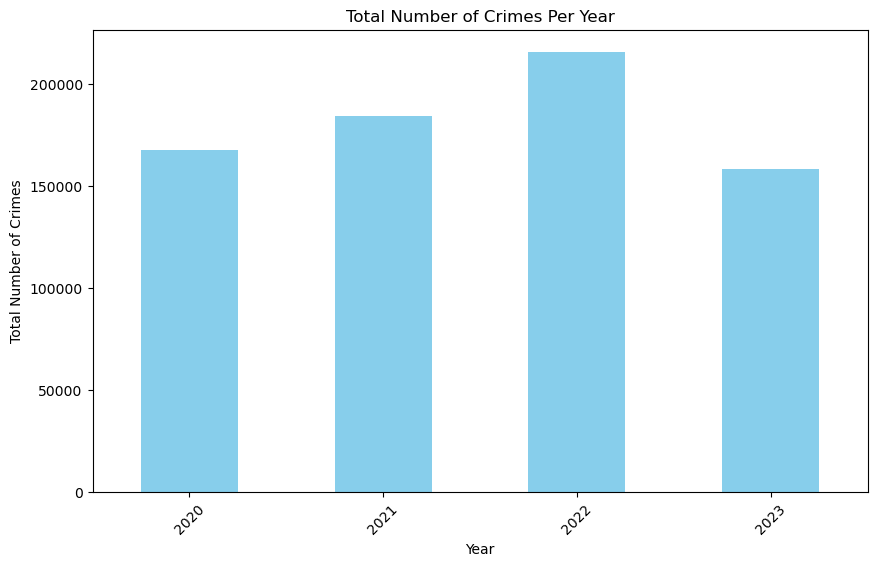

In [19]:
# Group the DataFrame by the year of occurrence and sum the 'DR_NO' column to get the total number of crimes per year.
crime_per_year = df.groupby('occ_year')['DR_NO'].sum()

# Create a bar plot to visualize the total number of crimes per year.
plt.figure(figsize=(10, 6))
crime_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes Per Year')
plt.xticks(rotation=45)
plt.show()

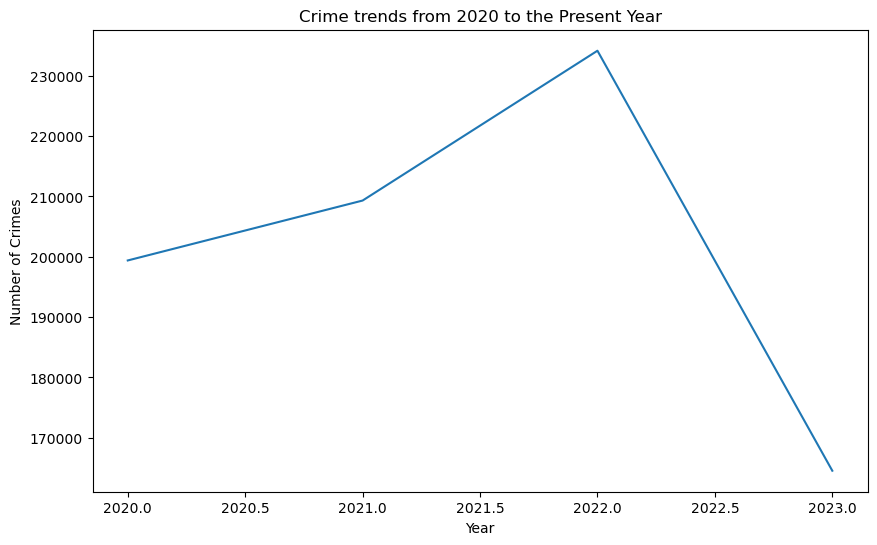

In [20]:
# Set the figure size for the plot.
plt.figure(figsize = (10, 6))
plt.title('Crime trends from 2020 to the Present Year')

# Group the DataFrame by the year of occurrence and count the number of crimes in each year.
crime_by_year = df.groupby('occ_year').count().reset_index()

# Create a line plot using Seaborn to show the trend of the number of crimes per year.
sns.lineplot(data = crime_by_year, x = 'occ_year', y = 'Crm Cd Desc')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

#### Seasonal Patterns

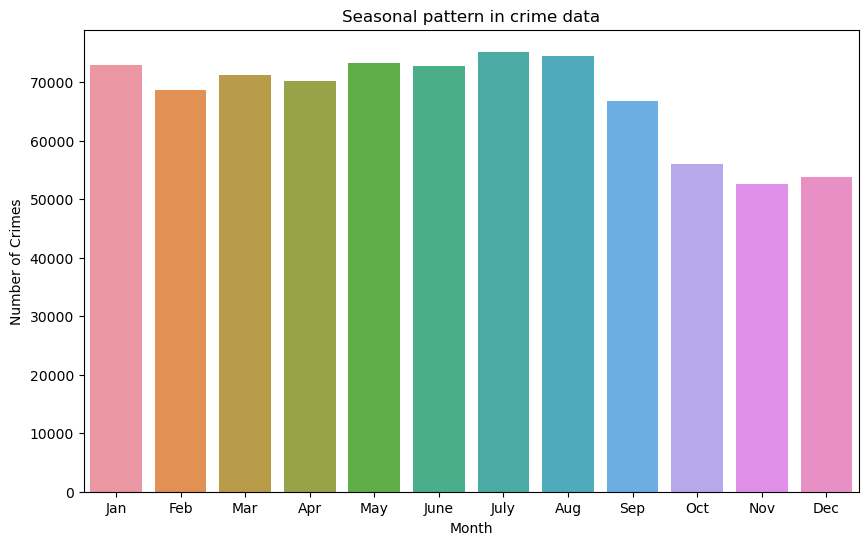

In [21]:
plt.figure(figsize = (10, 6))

# Group the DataFrame by the month of occurrence and count the number of crimes in each month.
crime_by_month = df.groupby('occ_month').count().reset_index()
plt.title('Seasonal pattern in crime data')

# Create a bar plot using Seaborn to show the number of crimes per month.
sns.barplot(data = crime_by_month, x = 'occ_month', y = 'Crm Cd Desc')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Set custom labels for the x-axis (month names).
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

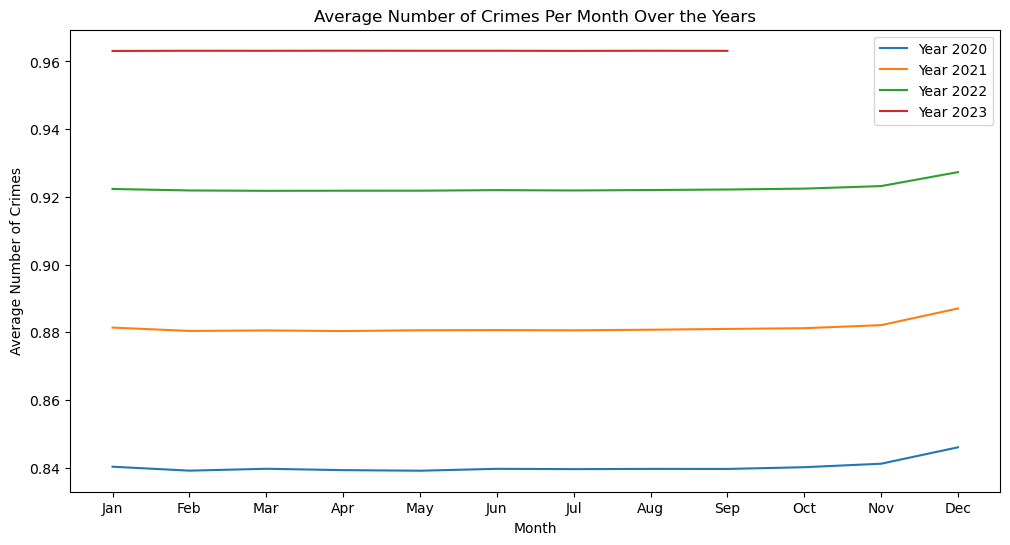

In [22]:
# Calculate the average number of crimes per month for each year and store the results in 'average_crimes_per_month'.
average_crimes_per_month = df.groupby(['occ_year', 'occ_month'])['DR_NO'].mean()

# Create a DataFrame to hold the results and reset the index
average_crimes_df = average_crimes_per_month.reset_index()

# Plot the results
plt.figure(figsize=(12, 6))

# Iterate through unique years in the DataFrame.
for year in average_crimes_df['occ_year'].unique():
    # Extract data for the current year.
    year_data = average_crimes_df[average_crimes_df['occ_year'] == year]
    
    # Plot the data as a line, using the month as the x-axis and the average number of crimes as the y-axis, with a label indicating the year.
    plt.plot(year_data['occ_month'], year_data['DR_NO'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.title('Average Number of Crimes Per Month Over the Years')

# Display a legend indicating the year for each line on the plot.
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### Most Common Crime Type:

In [23]:
crime_type_counts = data['Crm Cd Desc'].value_counts()

# Identify the crime type with the highest frequency
most_frequent_crime = crime_type_counts.idxmax()  # Get the index (crime type) with the highest count.
highest_frequency = crime_type_counts.max()  # Get the highest count.

print("Crime Type with the Highest Frequency:", most_frequent_crime)
print("Frequency:", highest_frequency)

Crime Type with the Highest Frequency: VEHICLE - STOLEN
Frequency: 86335


Most Common Crime: VEHICLE - STOLEN


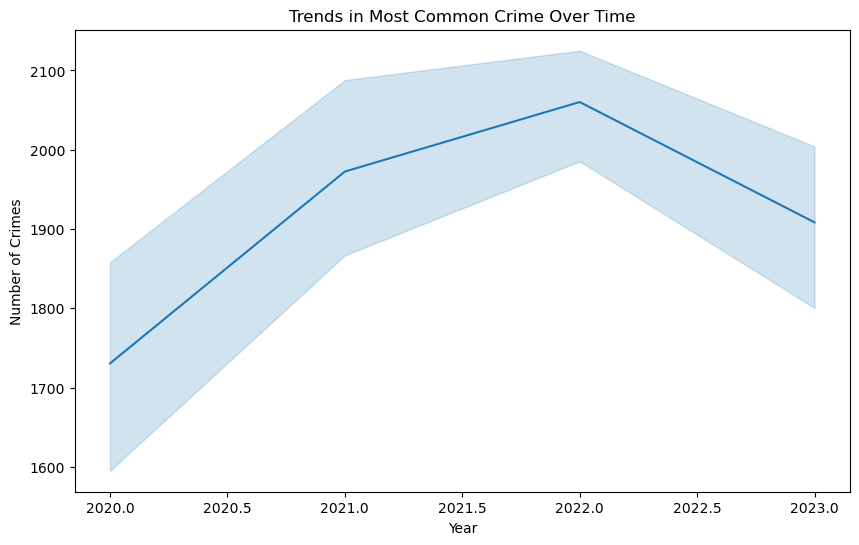

In [24]:
# Calculate the frequency of each crime type in the 'Crm Cd Desc' column.
crime_counts = df['Crm Cd Desc'].value_counts()

# Identify the most common crime type with the highest frequency.
most_common_crime = crime_counts.idxmax()

print("Most Common Crime:", most_frequent_crime)

# Create a DataFrame containing data only for the most common crime type.
most_common_crime_data = df[df['Crm Cd Desc'] == most_common_crime]

# Add 'Year' and 'Month' columns to 'most_common_crime_data'.
most_common_crime_data['Year'] = df['occ_year']
most_common_crime_data['Month'] = df['occ_month']

# Group the data by year and month, and count the number of crimes in each period.
crime_trends = most_common_crime_data.groupby(['Year', 'Month'])['DR_NO'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Trends in Most Common Crime Over Time")

# Create a line plot to show the number of crimes over the years.
sns.lineplot(data=crime_trends, x = 'Year', y = 'DR_NO')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

#### Regional Differences

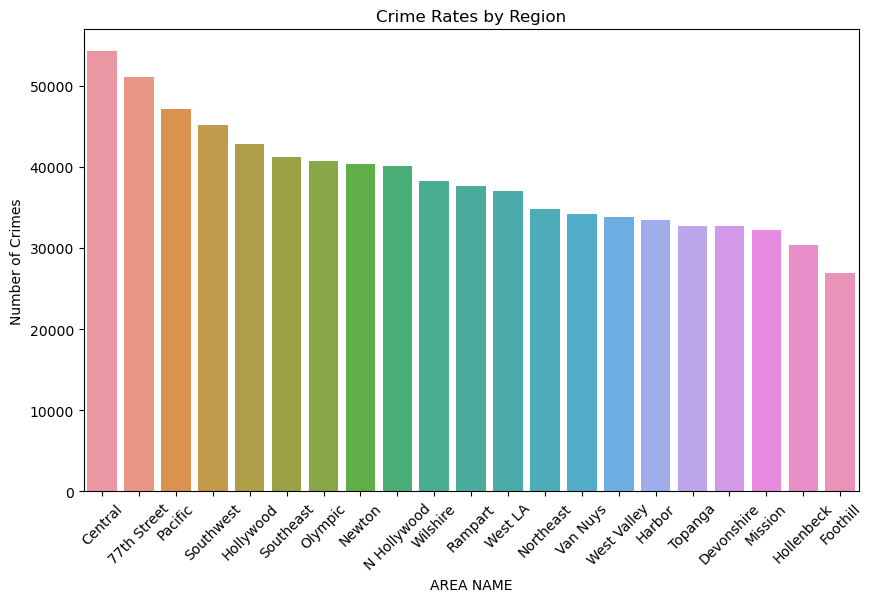

In [25]:
# Group the data by 'AREA NAME' and count the number of crimes in each region, then reset the index.
crime_by_region = data.groupby('AREA NAME')['DR_NO'].count().reset_index()

# Sort the regions in descending order of crime frequency.
crime_by_region = crime_by_region.sort_values(by = 'DR_NO', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Crime Rates by Region')

# Create a bar plot to show the number of crimes in each region.
sns.barplot(data=crime_by_region, x='AREA NAME', y='DR_NO')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

#### Correlation with Economic Factors:

In [26]:
# Group the 'df' DataFrame by year and month to count the number of crimes in each period.
crime_data = df.groupby(['occ_year','occ_month']).count()

# Load economic data from a CSV file (assuming it contains economic factors) into a DataFrame.
economic_data = pd.read_csv('economic factors.csv')

# Add a new column 'Crime count' in the 'economic_data' DataFrame and populate it with crime counts from the 'crime_data' DataFrame.
economic_data['Crime count']=crime_data['DR_NO'].reset_index()['DR_NO']


economic_data

Date  Unemployment Rate  Income Level  GDP (Billion USD)  \
0   08-01-2020              0.159       53800.0               1090   
1   08-02-2020              0.158       53900.0               1100   
2   08-03-2020              0.157       54000.0               1110   
3   08-04-2020              0.156       54100.0               1120   
4   08-05-2020              0.155       54200.0               1130   
5   08-06-2020              0.154       54300.0               1140   
6   08-07-2020              0.153       54400.0               1150   
7   08-08-2020              0.152       54500.0               1160   
8   08-09-2020              0.151       54600.0               1170   
9   08-10-2020              0.150       54700.0               1180   
10  08-11-2020              0.149       54800.0               1190   
11  08-12-2020              0.148       54900.0               1200   
12  08-01-2021              0.147       55000.0               1210   
13  08-02-2021              0.146       55100.0               1220   
14  08-03-2021              0.145       55200.0               1230   
15  08-04-2021              0.144       55300.0               1240   
16  08-05-2021              0.143       55400.0               1250   
17  08-06-2021              0.142       55500.0               1260   
18  08-07-2021              0.141       55600.0               1270   
19  08-08-2021              0.140       55700.0               1280   
20  08-09-2021              0.139       55800.0               1290   
21  08-10-2021              0.138       55900.0               1300   
22  08-11-2021              0.137       56000.0               1310   
23  08-12-2021              0.136       56100.0               1320   
24  08-01-2022              0.135       56200.0               1330   
25  08-02-2022              0.134       56300.0               1340   
26  08-03-2022              0.133       56400.0               1350   
27  08-04-2022              0.125       56000.0               1300   
28  08-05-2022              0.123       56100.0               1310   
29  08-06-2022              0.121       56200.0               1320   
30  08-07-2022              0.119       56300.0               1330   
31  08-08-2022              0.117       56400.0               1340   
32  08-09-2022              0.115       56500.0               1350   
33  08-10-2022              0.113       56600.0               1360   
34  08-11-2022              0.111       56700.0               1370   
35  08-12-2022              0.109       56800.0               1380   
36  08-01-2023              0.107       56900.0               1390   
37  08-02-2023              0.105       57000.0               1400   
38  08-03-2023              0.103       57100.0               1410   
39  08-04-2023              0.101       57200.0               1420   
40  03-05-2023              0.099       57300.0               1430   
41  08-05-2023              0.099       57300.0               1430   
42  08-06-2023              0.097       57400.0               1440   
43  08-07-2023              0.095       57500.0               1450   
44  08-08-2023              0.093       57600.0               1460   
45  08-09-2023              0.091       57700.0               1470   

    Poverty Rate  Crime count  
0          0.153      18478.0  
1          0.152      17252.0  
2          0.151      16157.0  
3          0.150      15676.0  
4          0.149      17200.0  
5          0.148      17028.0  
6          0.147      17112.0  
7          0.146      16870.0  
8          0.145      15629.0  
9          0.144      16480.0  
10         0.143      15565.0  
11         0.142      15937.0  
12         0.141      16531.0  
13         0.140      15403.0  
14         0.139      16313.0  
15         0.138      16047.0  
16         0.137      16985.0  
17         0.136      17144.0  
18         0.135      18654.0  
19         0.134      18365.0  
20         0.133      18347.0  
21         0.13

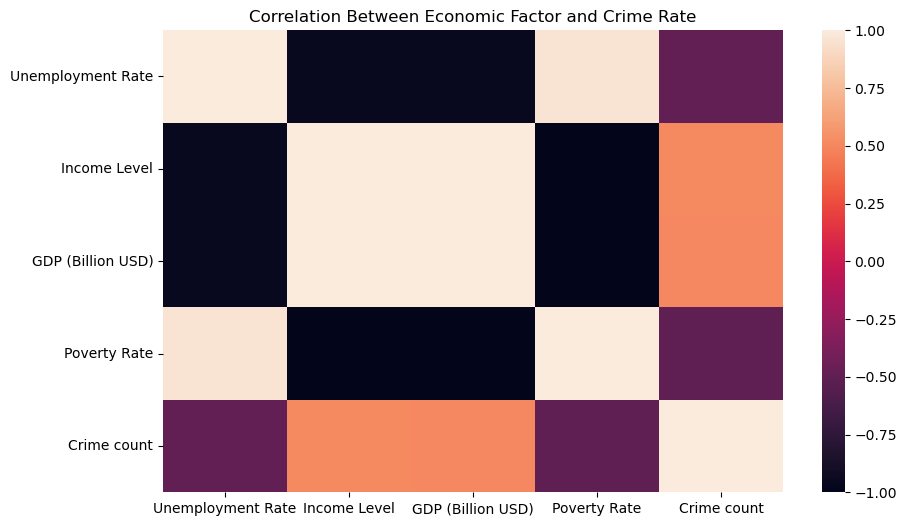

In [27]:
# Calculate the correlation matrix between economic factors and the crime count.
correlation=economic_data[['Unemployment Rate','Income Level','GDP (Billion USD)','Poverty Rate','Crime count']].corr()
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the correlation matrix.
sns.heatmap(data=correlation)
plt.title('Correlation Between Economic Factor and Crime Rate')
plt.show()

#### Day of the Week Analysis

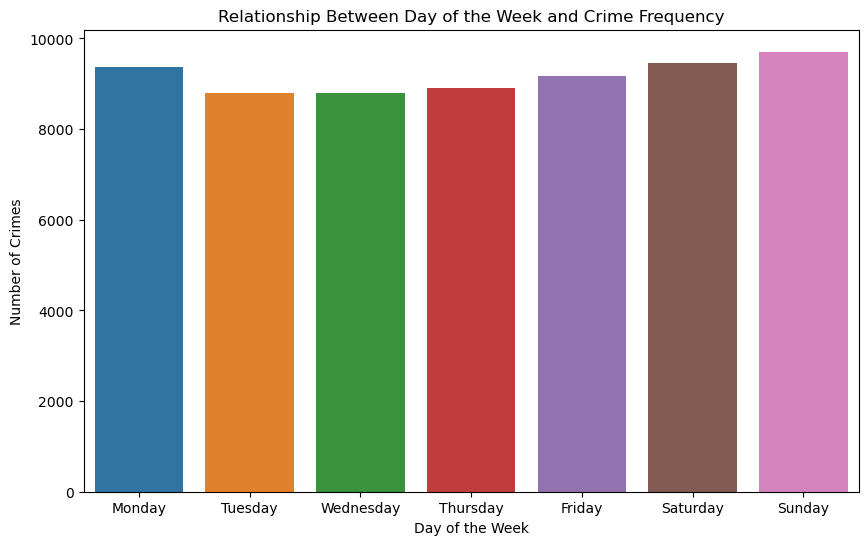

In [28]:
# Extract the day of the week from the 'Date Rptd' column and add it as a new column 'Day of Week'.
df['Day of Week'] = df['Date Rptd'].dt.day_name()

# Define the specific crime type to filter the data.
crime_types = ['BATTERY - SIMPLE ASSAULT']
# Filter the data to include only the specified crime type.
filtered_data = df[df['Crm Cd Desc'].isin(crime_types)]

# Group the filtered data by the day of the week and count the number of crimes in each day.
crime_by_day = filtered_data.groupby('Day of Week')['DR_NO'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.title('Relationship Between Day of the Week and Crime Frequency')
# Create a bar plot to show the distribution of the specified crime type over the days of the week.
sns.barplot(data = crime_by_day, x='Day of Week', y='DR_NO', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

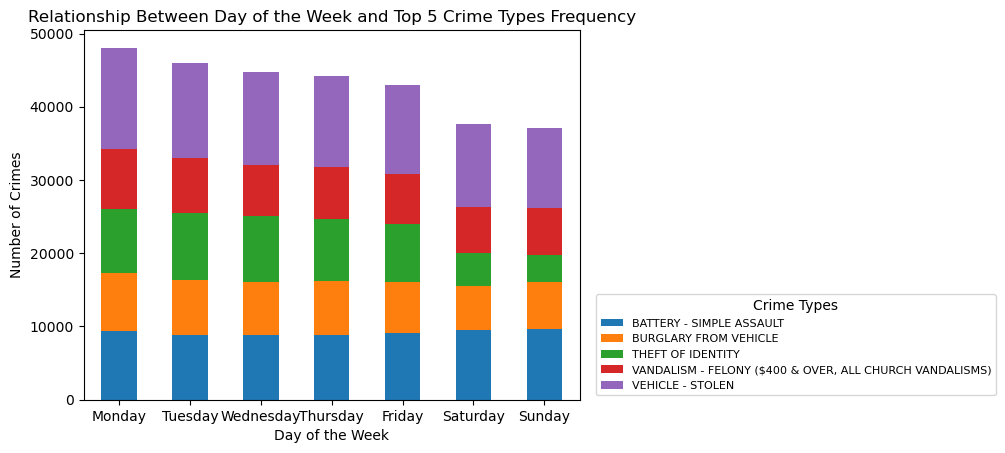

In [29]:
# Get the top 5 most frequent crime types.
top_5_crime_types = df['Crm Cd Desc'].value_counts().head(5).index
# Filter the data to include only the top 5 crime types.
filtered_data = df[df['Crm Cd Desc'].isin(top_5_crime_types)]
# Extract the day of the week from the 'Date Rptd' column and add it as a new column 'Day of Week'.
filtered_data['Day of Week'] = filtered_data['Date Rptd'].dt.day_name()

# Group and pivot the data for creating a stacked bar graph
crime_by_day_type = filtered_data.groupby(['Day of Week', 'Crm Cd Desc'])['DR_NO'].count().reset_index()
crime_pivot = crime_by_day_type.pivot(index='Day of Week', columns='Crm Cd Desc', values='DR_NO').fillna(0)
# Define the order of days of the week for the x-axis.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Create a stacked bar graph based on the pivoted data.
crime_pivot.loc[day_order].plot(kind='bar', stacked=True)

plt.title('Relationship Between Day of the Week and Top 5 Crime Types Frequency')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
# Display the legend for the crime types.
plt.legend(title='Crime Types', loc='upper right', bbox_to_anchor=(1.85, 0.3), fontsize="8")
plt.show()

#### Investigate any impact of major events or policy changes on crime rates

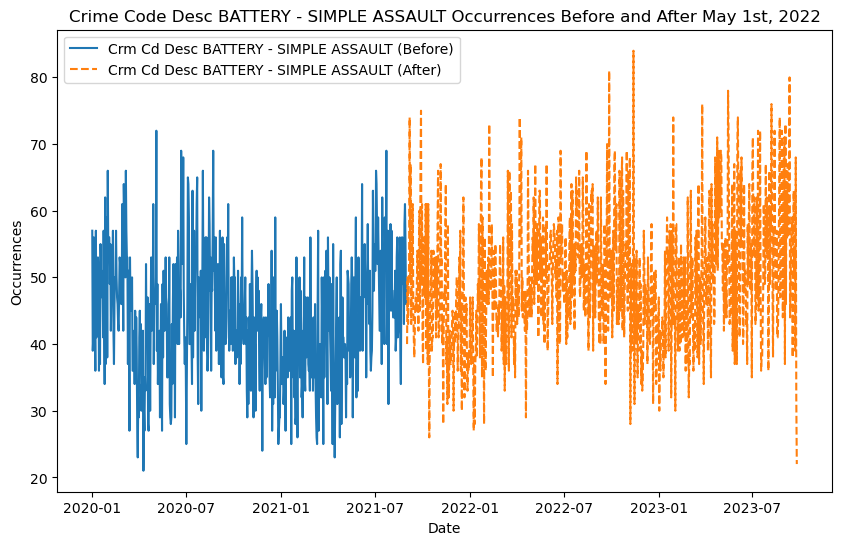

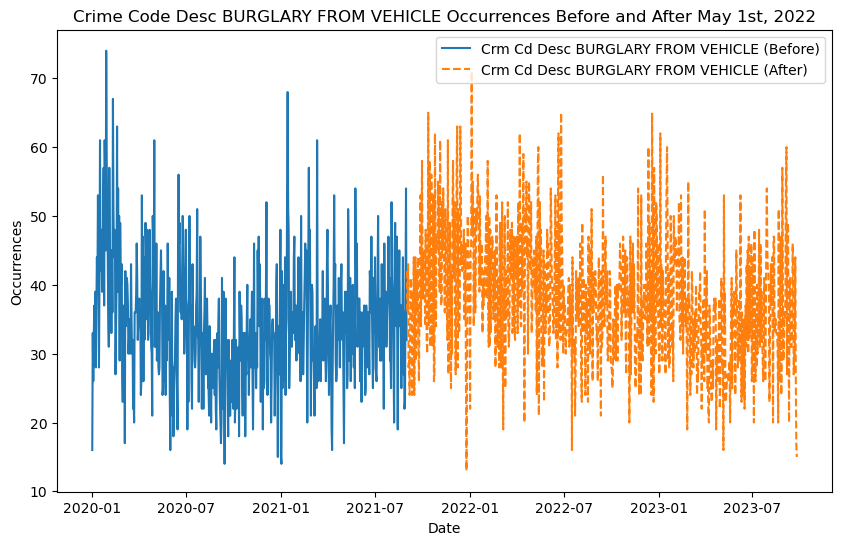

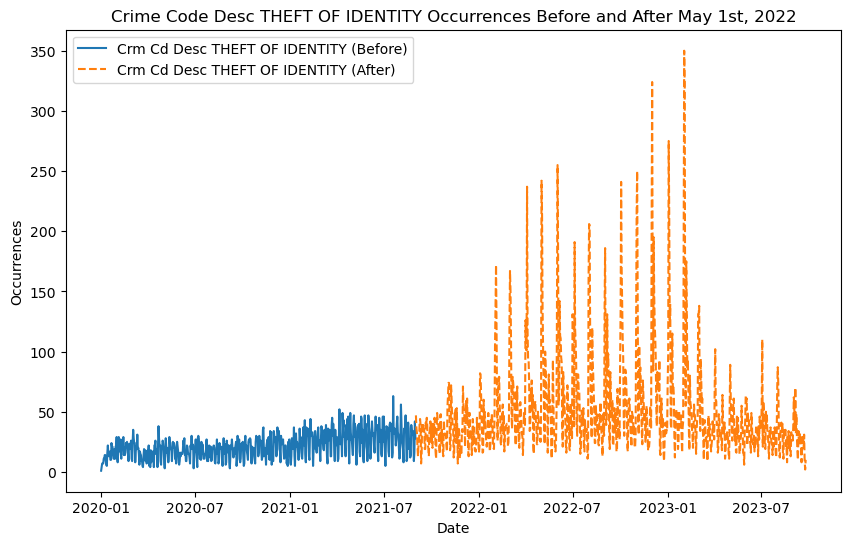

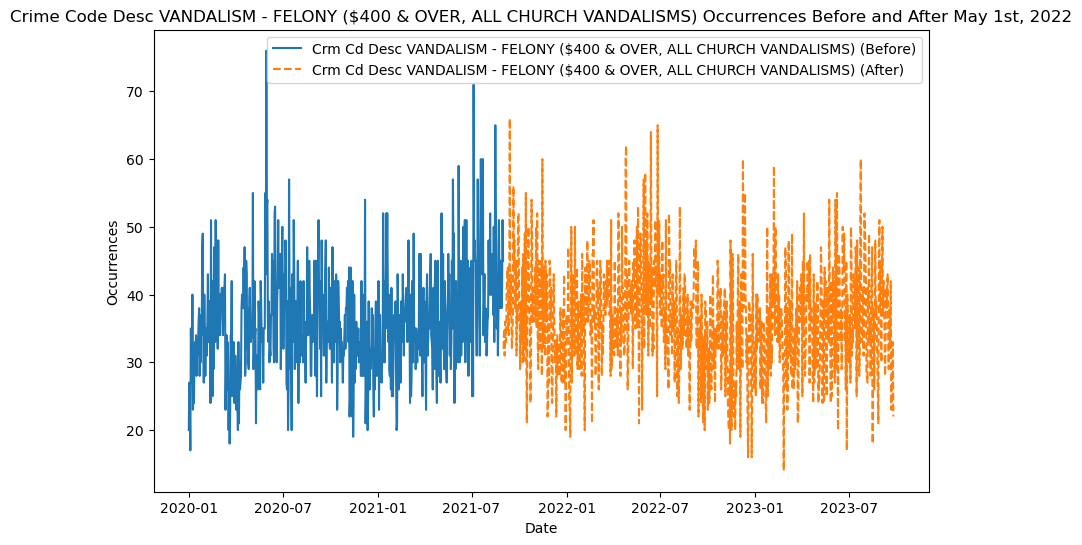

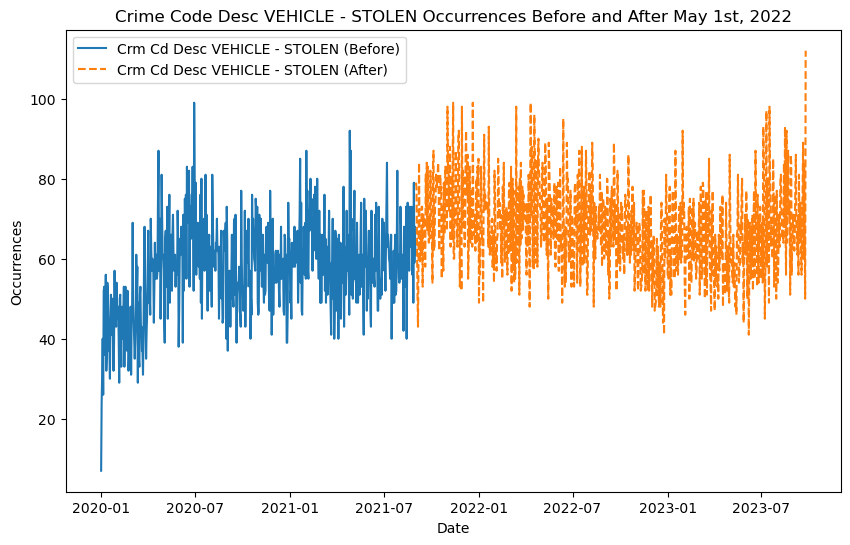

In [30]:
# Get the top 5 most frequent crime types.
top_5_crime_codes = df['Crm Cd Desc'].value_counts().head(5).index.tolist()

# Define the target date to split the data (after May 1st, 2022).
target_date = pd.to_datetime('2021-09-01') # after covid wave

# Separate the data into two periods: before and after the target date.
crime_before = df[df['Date Rptd'] < target_date]
crime_after = df[df['Date Rptd'] >= target_date]

# Filter the data to include only the top 5 crime types for both periods.
crime_before_top_5 = crime_before[crime_before['Crm Cd Desc'].isin(top_5_crime_codes)]
crime_after_top_5 = crime_after[crime_after['Crm Cd Desc'].isin(top_5_crime_codes)]

# Group the data for each crime type separately.
groups_before = crime_before_top_5.groupby('Crm Cd Desc')
groups_after = crime_after_top_5.groupby('Crm Cd Desc')

# Iterate through each crime type to create line plots for occurrences before and after the target date.
for crm_cd, group in groups_before:
    plt.figure(figsize=(10, 6))
    # Group the data by the reporting date and count the occurrences.
    group = group.groupby('Date Rptd')['DR_NO'].count()
    
    # Create a line plot for occurrences before the target date.
    plt.plot(group.index, group.values, label=f'Crm Cd Desc {crm_cd} (Before)')
    plt.title(f'Crime Code Desc {crm_cd} Occurrences Before and After May 1st, 2022')
    plt.xlabel('Date')
    plt.ylabel('Occurrences')
    # Check if there is data for the same crime type after the target date.
    if crm_cd in groups_after.groups:
        group_after = groups_after.get_group(crm_cd).groupby('Date Rptd')['DR_NO'].count()
        # Create a dashed line plot for occurrences after the target date.
        plt.plot(group_after.index, group_after.values, label=f'Crm Cd Desc {crm_cd} (After)', linestyle='--')
    
    plt.legend()
    plt.show()

#### Outliers and Anomalies

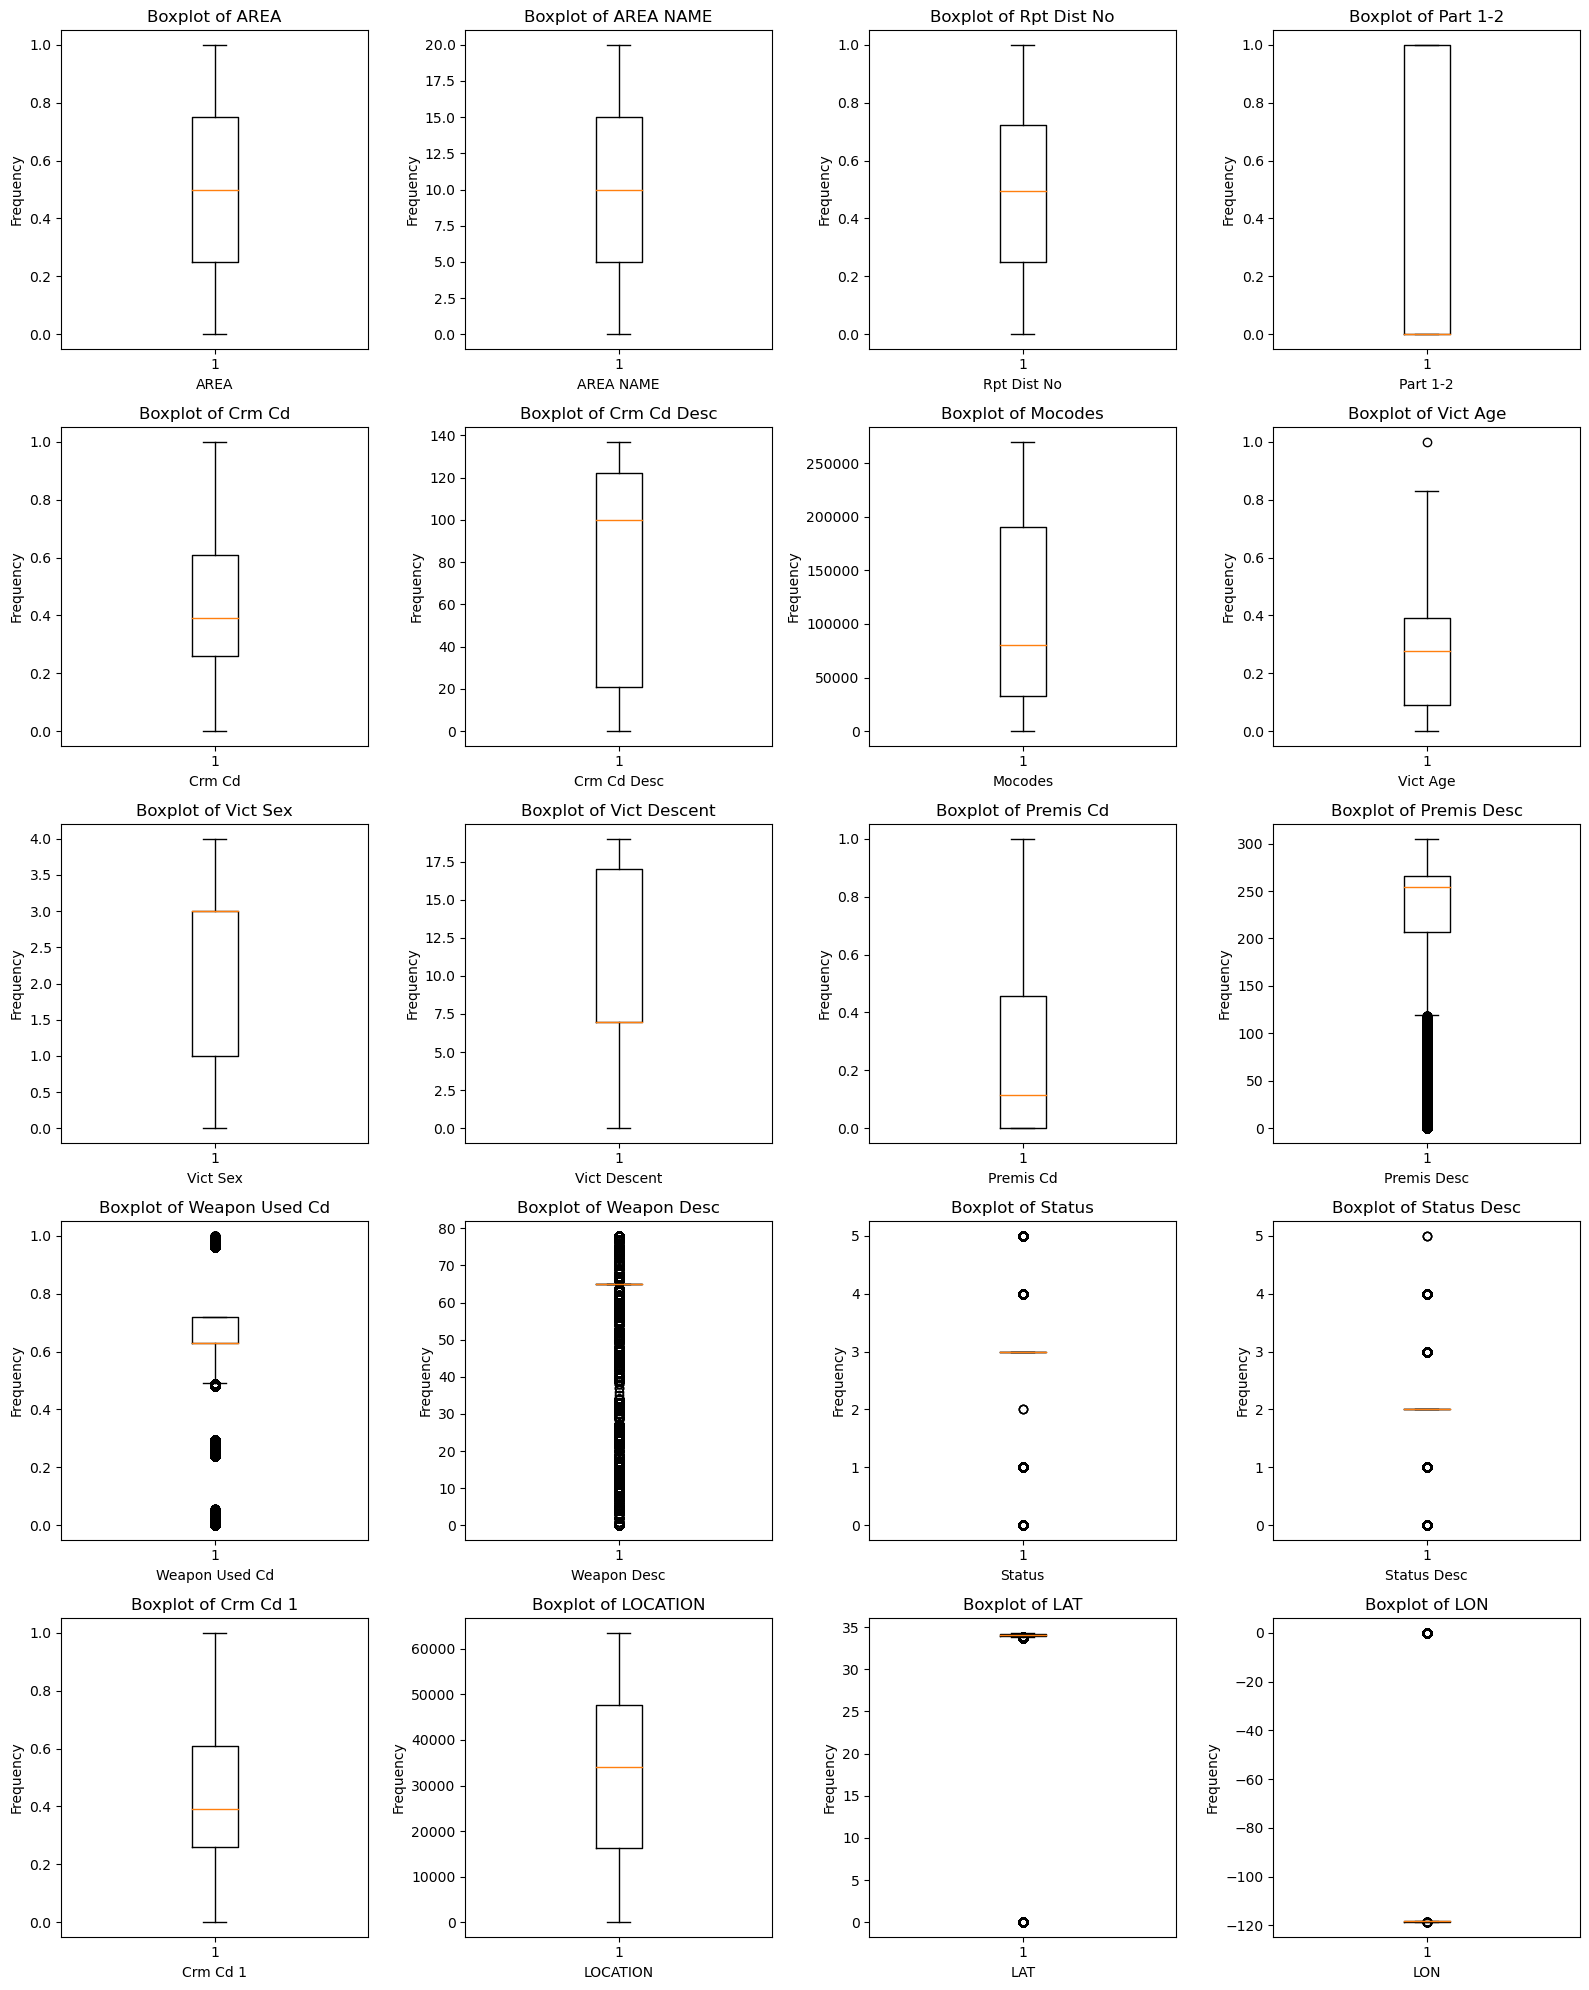

In [31]:
columns_per_row = 4

# Get the names of the columns to be plotted, starting from the 5th column (index 4).
column_names = df_enc.columns[4:]
num_cols = len(column_names)

# Calculate the number of rows needed to accommodate all columns.
num_rows = (num_cols - 1) // columns_per_row + 1

plt.figure(figsize=(16, 4 * num_rows))

# Iterate through each numerical column and create a boxplot in a subplot.
for i, column in enumerate(column_names):
    plt.subplot(num_rows, columns_per_row, i + 1)
    # plt.hist(df_enc[column], bins=20, color='blue', edgecolor='black')
    # Create a boxplot for the current column.
    plt.boxplot(df_enc[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Demographic Factors

In [32]:
# Define the list of relevant columns to be extracted.
relevant_columns = ['Vict Age', 'Vict Sex', 'Crm Cd', 'Crm Cd Desc']
# Create a new DataFrame 'data' that includes only the specified columns from the original DataFrame 'df.'
data = df[relevant_columns]

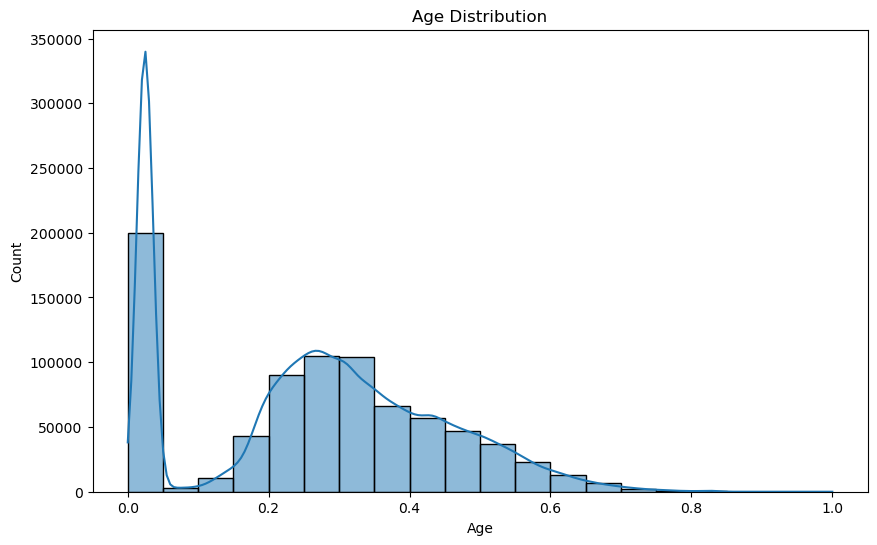

In [33]:
# Age Distribution
plt.figure(figsize=(10, 6))
# Create a histogram to display the distribution of victim ages.
sns.histplot(data['Vict Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

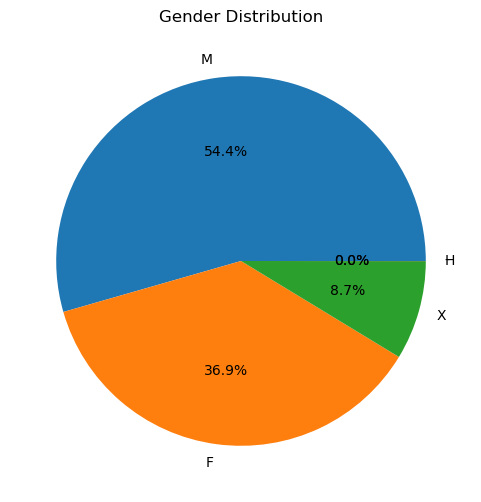

In [34]:
# Gender Distribution
# Calculate the counts of each gender category in the 'Vict Sex' column.
gender_counts = data['Vict Sex'].value_counts()
plt.figure(figsize=(6, 6))
# Create a pie chart to display the gender distribution of victims.
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

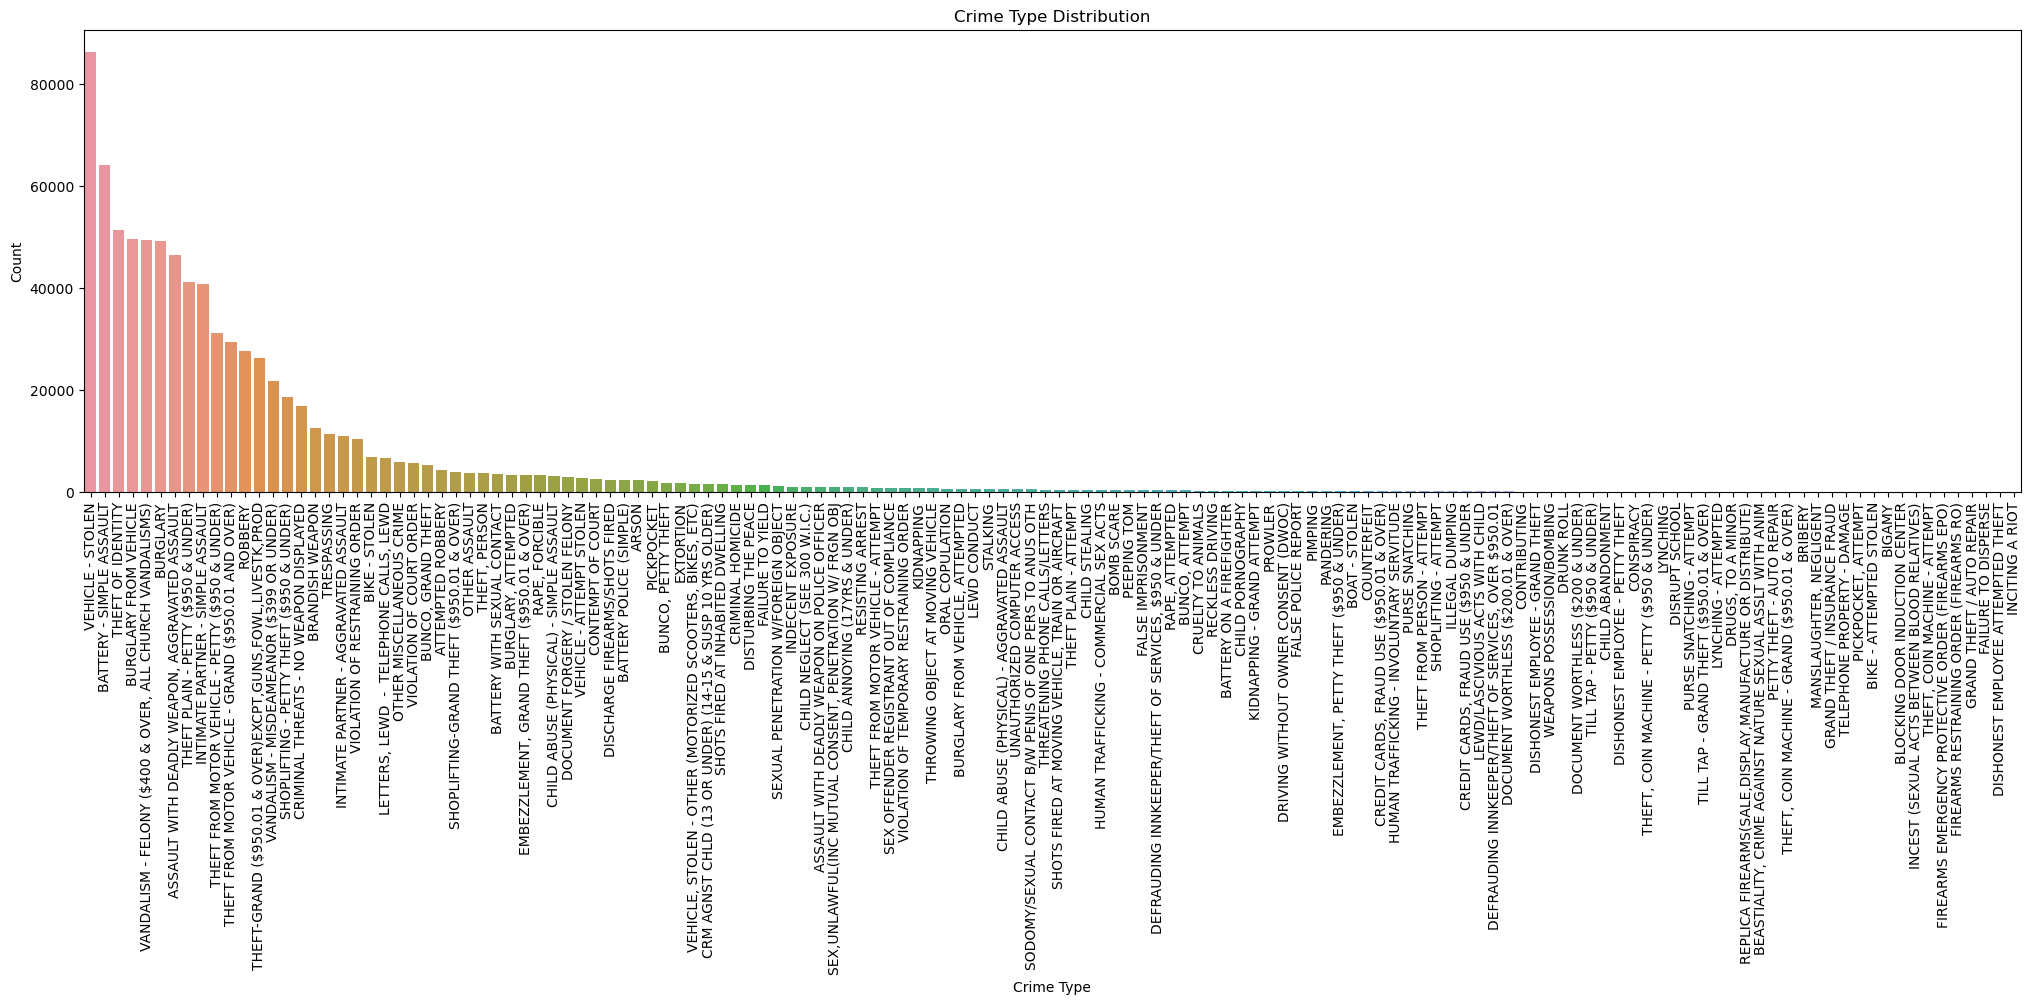

In [35]:
# Crime Type Distribution
plt.figure(figsize=(25, 6))
# Create a countplot to display the distribution of crime types.
sns.countplot(data=data, x='Crm Cd Desc', order=data['Crm Cd Desc'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Crime Type Distribution')
plt.show()

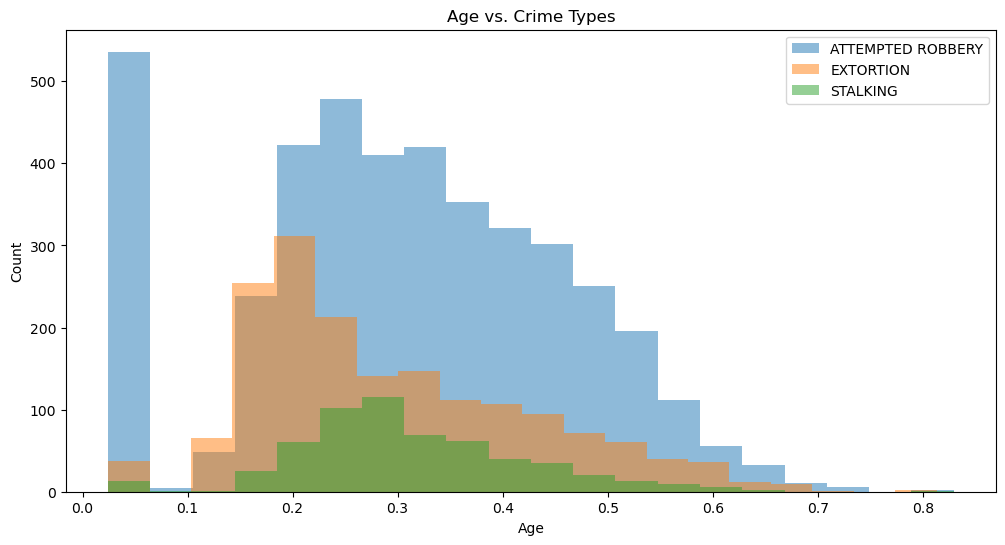

In [36]:
# Define a list of specific crime types to filter the data.
crimes_list = ['ATTEMPTED ROBBERY', 'EXTORTION', 'STALKING']
# Filter the DataFrame to include only data related to the specified crime types.
filtered_df = df[df['Crm Cd Desc'].isin(crimes_list)]

plt.figure(figsize=(12, 6))

# Iterate through each crime type and create a histogram for the age distribution.
for crime_type in crimes_list:
    data1 = filtered_df[filtered_df['Crm Cd Desc'] == crime_type]['Vict Age']
    # Create a histogram for the age distribution, using 20 bins and an alpha value for transparency.
    plt.hist(data1, bins=20, alpha=0.5, label=crime_type)

plt.title('Age vs. Crime Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

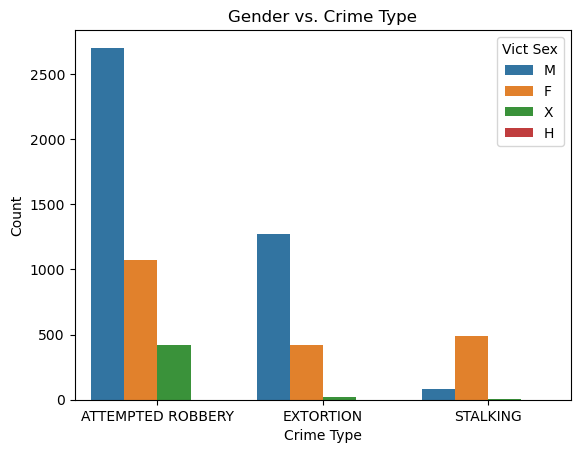

In [37]:
# Gender vs. Crime Type
# Define a list of specific crime types to filter the data.
crimes_list = ['ATTEMPTED ROBBERY', 'EXTORTION', 'STALKING']
# Filter the DataFrame to include only data related to the specified crime types.
filtered_df = df[df['Crm Cd Desc'].isin(crimes_list)]

# Create a countplot to show the relationship between gender and crime types.
sns.countplot(data=filtered_df, x='Crm Cd Desc', hue='Vict Sex', order=filtered_df['Crm Cd Desc'].value_counts().index)
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Gender vs. Crime Type')
plt.show()

# Advanced Analysis

In [38]:
! pip install prophet

DEPRECATION: Loading egg at c:\users\sivaa\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\sivaa\anaconda3\lib\site-packages\prophet-1.1.5-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [39]:
# Group the original DataFrame 'df' by 'Date Rptd,' count the occurrences, and reset the index.
df_1=df.groupby('Date Rptd').count().reset_index()[['Date Rptd','DR_NO']]
# Rename the columns to 'ds' (date) and 'y' (count).
df_1.rename(columns={'Date Rptd': 'ds', 'DR_NO': 'y'}, inplace=True)

df_1

ds    y
0    2020-01-01  354
1    2020-01-02  398
2    2020-01-03  403
3    2020-01-04  436
4    2020-01-05  420
...         ...  ...
1359 2023-09-21  582
1360 2023-09-22  610
1361 2023-09-23  537
1362 2023-09-24  474
1363 2023-09-25  389

[1364 rows x 2 columns]

In [40]:
from prophet import Prophet

# Create a Prophet model
model = Prophet()

# Fit the model to the historical crime data in 'df_1'
model.fit(df_1)

# Define the forecasting horizon
future = model.make_future_dataframe(periods=365)  # Forecast for one year

# Forecast future crime trends using the fitted model
forecast = model.predict(future)

# Display the last few rows of the forecast to examine the predicted trends
forecast.tail()

18:59:29 - cmdstanpy - INFO - Chain [1] start processing
18:59:29 - cmdstanpy - INFO - Chain [1] done processing


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1724 2024-09-20  597.850466  527.636988  664.937401   577.295072   621.563307   
1725 2024-09-21  597.774129  470.101424  604.555943   577.053714   621.552690   
1726 2024-09-22  597.697792  460.210886  601.432876   576.828497   621.588142   
1727 2024-09-23  597.621455  584.551759  731.523448   576.582060   621.606249   
1728 2024-09-24  597.545118  568.819289  698.334327   576.354746   621.652048   

      additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
1724        0.658088              0.658088              0.658088   0.605225   
1725      -58.419840            -58.419840            -58.419840 -58.450749   
1726      -66.590787            -66.590787            -66.590787 -66.654857   
1727       59.688997             59.688997             59.688997  59.542691   
1728       33.004824             33.004824             33.004824  32.733242   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1724      0.605225      0.605225  0.052863      0.052863      0.052863   
1725    -58.450749    -58.450749  0.030909      0.030909      0.030909   
1726    -66.654857    -66.654857  0.064069      0.064069      0.064069   
1727     59.542691     59.542691  0.146306      0.146306      0.146306   
1728     32.733242     32.733242  0.271583      0.271583      0.271583   

      multiplicative_terms  multiplicative_terms_lower  \
1724                   0.0                         0.0   
1725                   0.0                         0.0   
1726                   0.0                         0.0   
1727                   0.0                         0.0   
1728                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1724                         0.0  598.508554  
1725                         0.0  539.354289  
1726                         0.0  531.107005  
1727                         0.0  657.310452  
1728                         0.0  630.549943

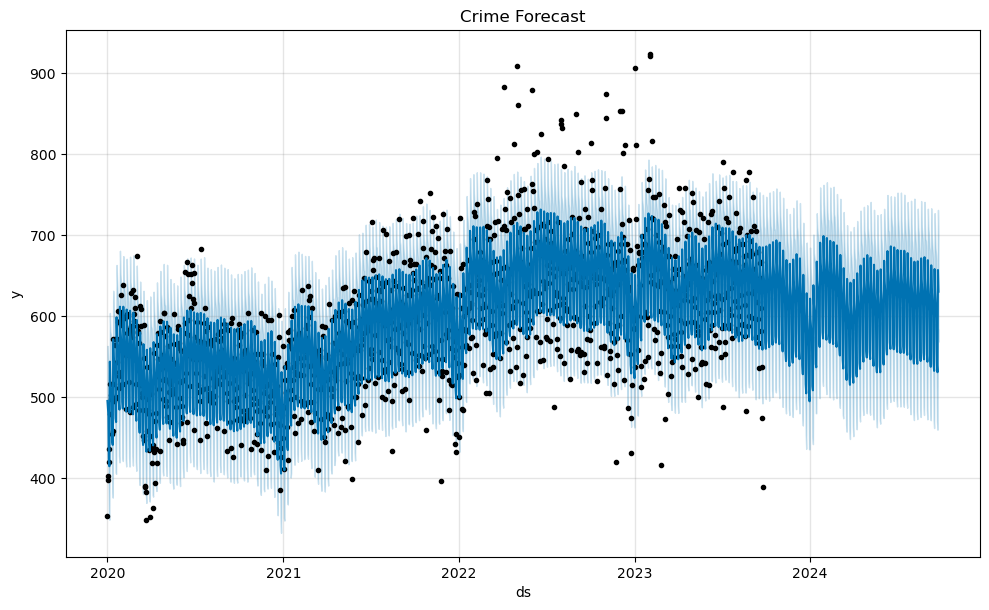

In [41]:
fig = model.plot(forecast)
# Plotting the model
plt.title('Crime Forecast')
plt.show()

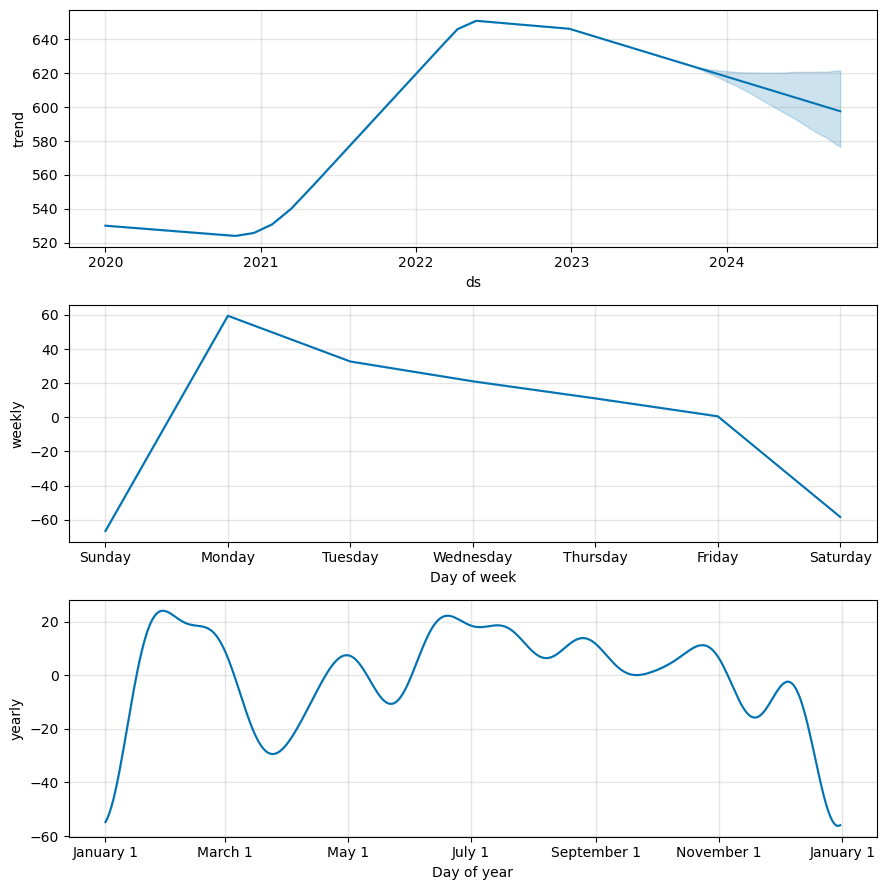

In [42]:
# Generate component plots to visualize the model's forecasted components
fig2 = model.plot_components(forecast)
# Display the component plots
plt.show()

In [43]:
from prophet.plot import plot_plotly, plot_components_plotly

# Create an interactive plot for the entire forecast
plot_plotly(model, forecast)